<a href="https://colab.research.google.com/github/vamsikartik01/Machine-Learning/blob/main/Calories_burn/Calories_burn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd drive/MyDrive/Datasets/calories_burn/

/content/drive/MyDrive/Datasets/calories_burn


import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import data from csv files 

In [ ]:
exercise_data = pd.read_csv('exercise.csv')
calories_data = pd.read_csv('calories.csv')
print(exercise_data.head())
print(calories_data.head())

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8
    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0


For Data visualization and analysis let us join the datasets

In [ ]:
data = pd.merge(exercise_data, calories_data, on='User_ID')
data.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2,72.0


Lets visualize how various features effects on burning the calories

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Duration of exercise vs Calories burned')

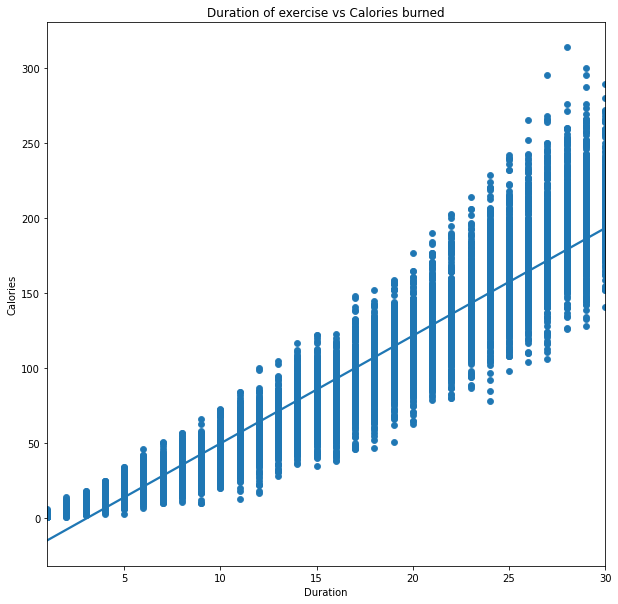

In [ ]:
plt.figure(figsize=(10,10))
#plt.scatter(data['Duration'], data['Calories'])
sns.scatterplot(data['Duration'],data['Calories'])
sns.regplot(data['Duration'],data['Calories'])
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.title('Duration of exercise vs Calories burned')

There is a linear relation between duration of exercise and calories burned.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Heart rate vs Calories burned')

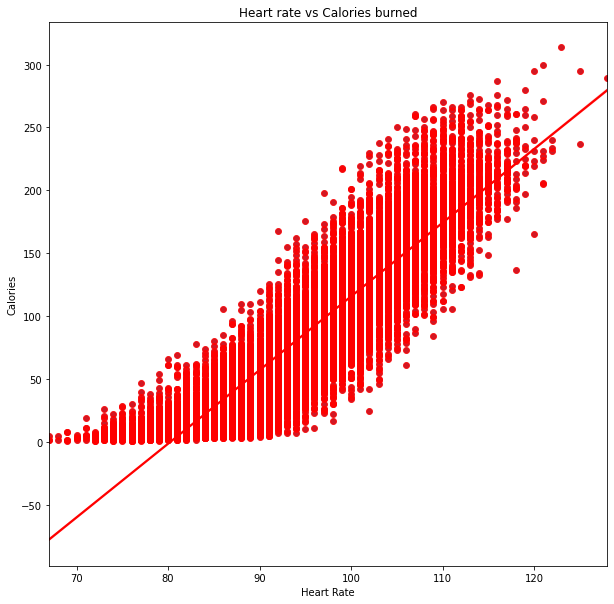

In [ ]:
plt.figure(figsize=(10,10))
#plt.scatter(data['Heart_Rate'], data['Calories'])
sns.scatterplot(data['Heart_Rate'],data['Calories'])
sns.regplot(data['Heart_Rate'],data['Calories'],color='red')
plt.xlabel('Heart Rate')
plt.ylabel('Calories')
plt.title('Heart rate vs Calories burned')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Body temperature vs Calories burned')

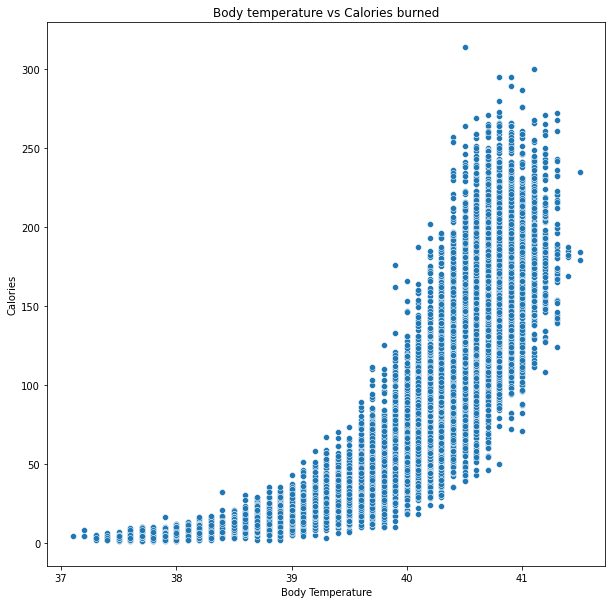

In [ ]:
plt.figure(figsize=(10,10))
#plt.scatter(data['Body_Temp'], data['Calories'])
sns.scatterplot(data['Body_Temp'],data['Calories'])
plt.xlabel('Body Temperature')
plt.ylabel('Calories')
plt.title('Body temperature vs Calories burned')

The body temperature and the Calories have a polinomial relationship

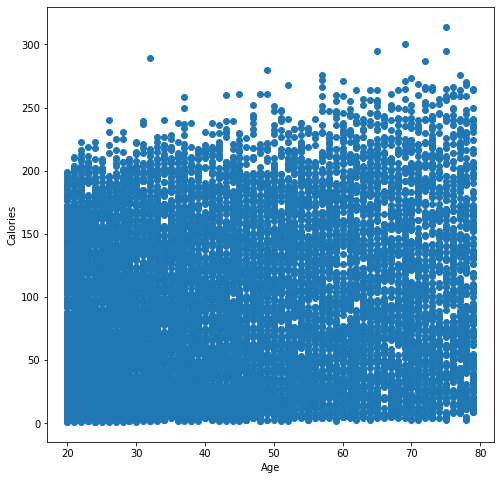

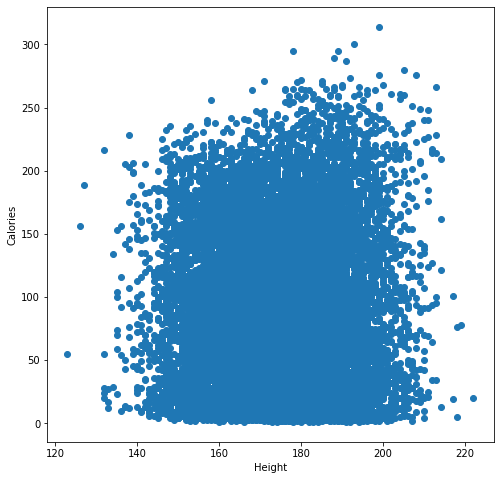

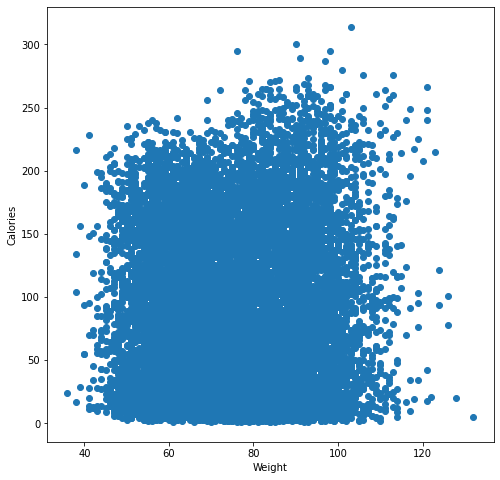

In [ ]:
for i in ['Age' ,'Height', 'Weight']:
  plt.figure(figsize=(8,8))
  plt.scatter(data[i],data['Calories'])
  plt.xlabel(i)
  plt.ylabel("Calories")
  plt.show()

There is no predictable information with these features

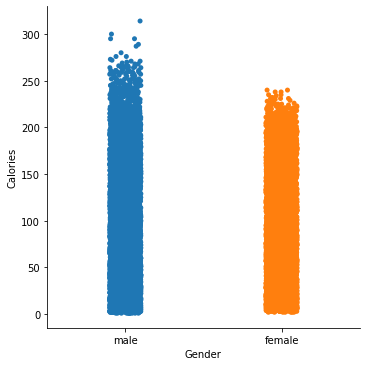

In [ ]:
sns.catplot(x='Gender', y='Calories', data=data)

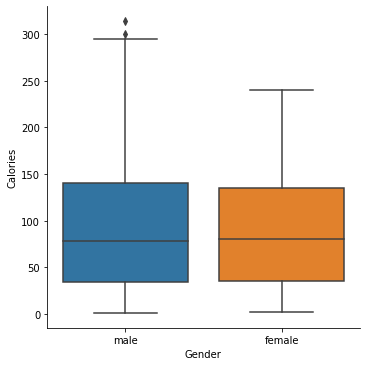

In [ ]:
sns.catplot(x='Gender', y='Calories', data=data, kind='box')

The major factors which effects the calories are duration of workout, heartrate, and bodytemperature

# Feature Engineering

In [ ]:
for feature in data.columns:
  print(feature, data[feature].isnull().sum())

User_ID 0
Gender 0
Age 0
Height 0
Weight 0
Duration 0
Heart_Rate 0
Body_Temp 0
Calories 0


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
transformer = PolynomialFeatures()
poly_data = np.array(data['Body_Temp']).reshape(-1,1)
print(poly_data[:5],poly_data.shape)
poly_data = transformer.fit_transform(poly_data)
print(poly_data[:5], poly_data.shape)

[[40.8]
 [40.3]
 [38.7]
 [40.5]
 [39.8]] (15000, 1)
[[1.00000e+00 4.08000e+01 1.66464e+03]
 [1.00000e+00 4.03000e+01 1.62409e+03]
 [1.00000e+00 3.87000e+01 1.49769e+03]
 [1.00000e+00 4.05000e+01 1.64025e+03]
 [1.00000e+00 3.98000e+01 1.58404e+03]] (15000, 3)


In [ ]:
df = pd.DataFrame(poly_data, columns = ['bt0','bt1','bt2'])
df.head()

,bt0,bt1,bt2
0,1.0,40.8,1664.64
1,1.0,40.3,1624.09
2,1.0,38.7,1497.69
3,1.0,40.5,1640.25
4,1.0,39.8,1584.04


In [ ]:
dataset = pd.concat([data, df],axis=1)
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,bt0,bt1,bt2
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1.0,40.8,1664.64
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1.0,40.3,1624.09
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1.0,38.7,1497.69
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1.0,40.5,1640.25
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1.0,39.8,1584.04


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for feature in ['Duration', 'Heart_Rate']:
    scaled_data = np.array(data[feature]).reshape(-1,1)
    scaled_data = scaler.fit_transform(scaled_data)
    df = pd.DataFrame(scaled_data, columns = [feature+'_scaled'])
    dataset = pd.concat([dataset, df], axis=1)
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,bt0,bt1,bt2,Duration_scaled,Heart_Rate_scaled
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1.0,40.8,1664.64,1.619127,0.989404
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1.0,40.3,1624.09,-0.183990,-0.158461
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1.0,38.7,1497.69,-1.265861,-0.784569
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1.0,40.5,1640.25,-0.304198,0.467647
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1.0,39.8,1584.04,-0.664821,-1.515029


Feature Selection

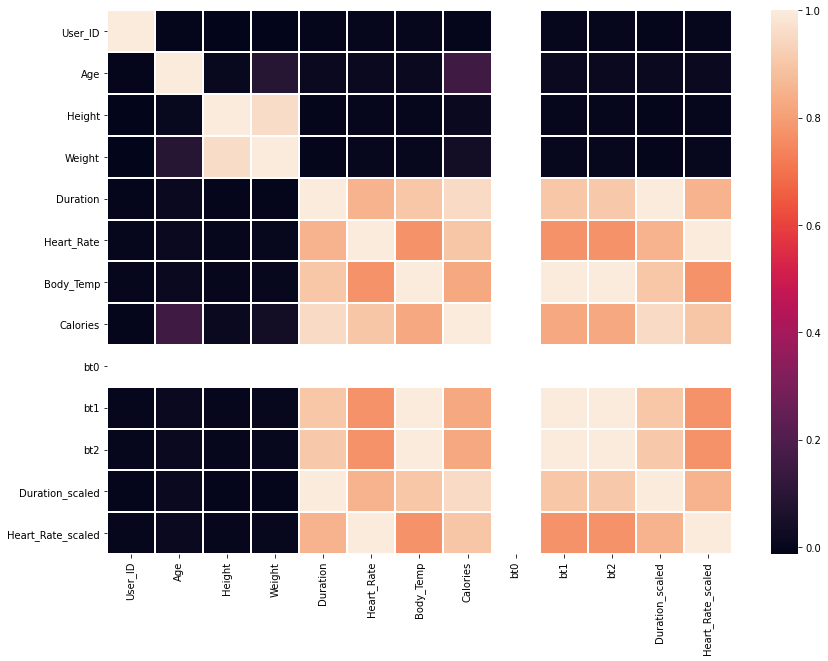

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(dataset.corr(),linewidths=1)

features are duration, heart rate, bodytemp

In [ ]:
train_data = dataset[['bt1','bt2','Duration_scaled','Heart_Rate_scaled']]
train_data.head()

,bt1,bt2,Duration_scaled,Heart_Rate_scaled
0,40.8,1664.64,1.619127,0.989404
1,40.3,1624.09,-0.183990,-0.158461
2,38.7,1497.69,-1.265861,-0.784569
3,40.5,1640.25,-0.304198,0.467647
4,39.8,1584.04,-0.664821,-1.515029


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(train_data, dataset['Calories'], test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10500, 4)
(4500, 4)
(10500,)
(4500,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
preds = model.predict(x_test)

In [ ]:
y_preds = np.array(y_test).reshape(-1,1)
preds = preds.reshape(-1,1)

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
print(rmse(preds,y_preds))


14.063791261550215


In [ ]:
model.coef_

array([-368.88021322,    4.50888202,   50.74816654,   19.14408033])